# Với từng ảnh: 

Trực quan hóa từng kết quả layer sau khi cho 1 ảnh input qua các lớp trong mạng học sâu 

Trực quan các nhãn kết quả dự đoán với mỗi ảnh

# Setup model

In [1]:
%cd /Data/Projects/ThyroidCancerClassifier

/Data/Projects/ThyroidCancerClassifier


/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from src.model.classifier.H97 import H97_EfficientNet

# Tạo mô hình
model_path = "/Data/Projects/ThyroidCancer_InfoData_Local/kaggle/working/h97_retrainEfficientNet_B2_B5_B6_dataver3/best_h97_retrainEfficientNet_B2_B5_B6_dataver3_model.pt"
model = H97_EfficientNet()
model.load_state_dict(
    torch.load(
        model_path,
        map_location=torch.device("cpu"),
    )
)

<All keys matched successfully>

# Trực quan hóa từng kết quả layer sau khi cho 1 ảnh input qua các lớp trong mạng học sâu 

In [12]:
# Load ảnh và tiền xử lý
def load_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Thay đổi kích thước ảnh về 224x224
        transforms.ToTensor(),  # Chuyển ảnh thành tensor
        # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Chuẩn hóa ảnh
    ])
    image = Image.open(image_path)
    image = transform(image)
    image = image.unsqueeze(0)  # Thêm batch dimension
    return image

# Hook lưu các đầu ra trung gian
activation = {}

def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

# Đăng ký hook cho feature extractor
for name, layer in model.feature_extractor.named_children():
    print(f'Name of layer: {name}, Layer: {layer}')
    layer.register_forward_hook(get_activation(name))

# Chạy mô hình với ảnh đầu vào
image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B5/431_3.jpg'
input_image = load_image(image_path)
model.eval()
with torch.no_grad():
    output = model(input_image)

Name of layer: 0, Layer: Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU(inplace=True)
  )
  (1): Sequential(
    (0): MBConv(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (activation): SiLU(inplace=True)
          (scale_activation): Sigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(32, 16, kernel_siz

In [25]:
input_image

tensor([[[[0.8353, 0.8196, 0.8039,  ..., 0.8824, 0.8941, 0.9020],
          [0.8275, 0.8078, 0.7922,  ..., 0.8863, 0.8941, 0.9020],
          [0.8157, 0.7961, 0.7843,  ..., 0.8745, 0.8824, 0.8902],
          ...,
          [0.9725, 0.9804, 0.9882,  ..., 0.1098, 0.1294, 0.1294],
          [0.9922, 0.9961, 0.9961,  ..., 0.1020, 0.1176, 0.1294],
          [1.0000, 1.0000, 1.0000,  ..., 0.0902, 0.1059, 0.1294]],

         [[0.7176, 0.7059, 0.6902,  ..., 0.8118, 0.8118, 0.8118],
          [0.7098, 0.6980, 0.6824,  ..., 0.8196, 0.8157, 0.8157],
          [0.7059, 0.6941, 0.6784,  ..., 0.8078, 0.8078, 0.8118],
          ...,
          [0.8824, 0.8863, 0.8902,  ..., 0.0980, 0.1137, 0.1059],
          [0.9020, 0.9059, 0.9020,  ..., 0.0863, 0.1020, 0.1059],
          [0.9137, 0.9176, 0.9137,  ..., 0.0745, 0.0902, 0.1059]],

         [[0.9608, 0.9569, 0.9529,  ..., 1.0000, 0.9922, 0.9922],
          [0.9647, 0.9569, 0.9569,  ..., 1.0000, 1.0000, 0.9961],
          [0.9725, 0.9647, 0.9608,  ..., 1

Trực hóa hóa lớp 0
Kích thước của tensor: torch.Size([1, 1280, 7, 7])


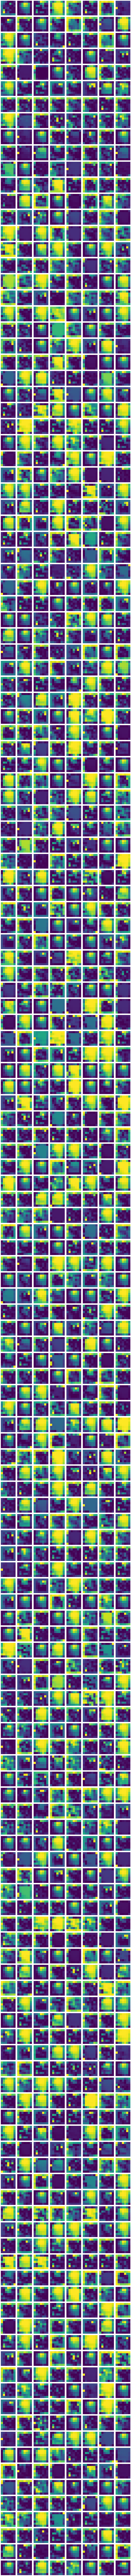

Trực hóa hóa lớp 1
Kích thước của tensor: torch.Size([1, 1280, 1, 1])


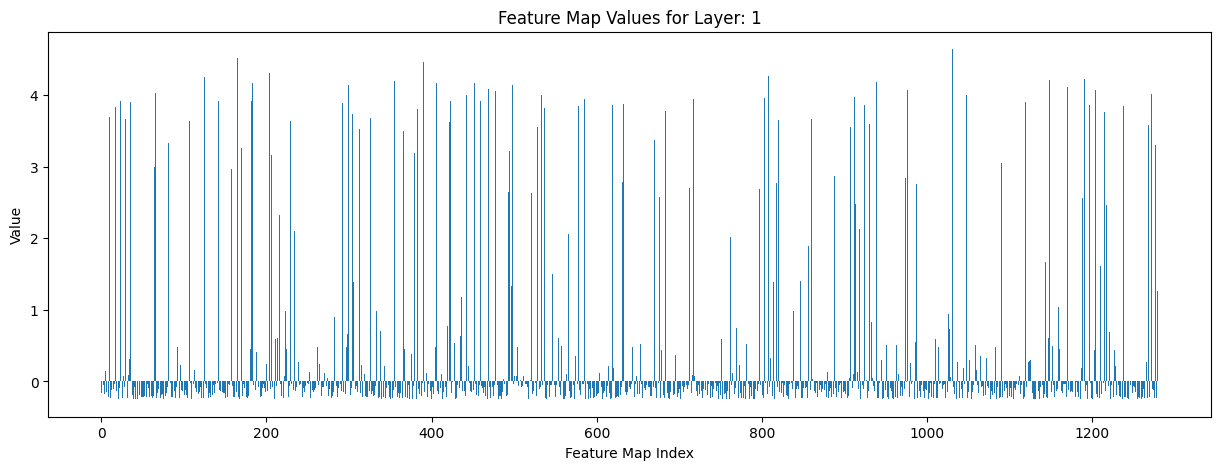

In [24]:
# Trực quan hóa các đầu ra trung gian
def plot_activation(activation, layer_name):
    print(f"Trực hóa hóa lớp {layer_name}")
    print(f"Kích thước của tensor: {activation[layer_name].shape}")
    act = activation[layer_name].squeeze()  # Loại bỏ batch dimension
    num_feature_maps = act.size(0)

    if len(act.size()) == 1:  # Tensor có kích thước [1280]
        # Hiển thị các giá trị của các feature maps dưới dạng biểu đồ
        plt.figure(figsize=(15, 5))
        plt.bar(np.arange(num_feature_maps), act.cpu().numpy())
        plt.xlabel('Feature Map Index')
        plt.ylabel('Value')
        plt.title(f'Feature Map Values for Layer: {layer_name}')
        plt.show()
    elif len(act.size()) == 3:  # Tensor có kích thước [1280, 7, 7]
        num_cols = 8
        num_rows = (num_feature_maps + num_cols - 1) // num_cols
        figsize = (num_cols * 2.5, num_rows * 2.5)  # Điều chỉnh kích thước hình ảnh
        fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
        axes = axes.flatten()
        for i in range(num_feature_maps):
            axes[i].imshow(act[i].cpu().numpy(), cmap='viridis')
            axes[i].axis('off')
        for i in range(num_feature_maps, len(axes)):
            axes[i].axis('off')

        plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Điều chỉnh khoảng cách giữa các cột và hàng
        plt.show()
    else:
        print(f"Không thể trực quan hóa tensor với hình dạng {act.shape} | act size: {act.size()}")

# Trực quan hóa đầu ra của lớp 0
for name in activation:
    plot_activation(activation, name)

# Get the Class Activation Map

In [6]:
def get_features(model, x):
    """
    Function to extract features from the penultimate layer of EfficientNet.

    Parameters:
    model (H97_EfficientNet): The trained model.
    x (torch.Tensor): The input image tensor.

    Returns:
    torch.Tensor: The extracted features.
    """
    feature_extractor = model.feature_extractor[:-1]
    with torch.no_grad():
        x = feature_extractor(x)
    print(x.shape)
    return x


def get_cam(features, fc_weights, target_class):
    """
    Function to compute the Class Activation Map (CAM).

    Parameters:
    features (torch.Tensor): The extracted features from the penultimate layer.
    fc_weights (torch.Tensor): The weights of the last fully connected layer.
    target_class (int): The target class index.

    Returns:
    np.ndarray: The computed CAM.
    """
    target_weight = fc_weights[target_class]

    cam = torch.zeros(features.size()[2:], dtype=torch.float32).to(features.device)
    print(target_weight)
    # for i, w in enumerate(target_weight):
    #     cam += w * features[0, i, :, :]

    for w in target_weight:
        for i in range(features.shape[1]):
            cam += w * features[0, i, :, :]

    cam = F.relu(cam)
    cam = cam - cam.min()
    cam = cam / cam.max()
    return cam.cpu().detach().numpy()


def load_image(image_path, label=None):
    """
    Load an image from a file and apply necessary transformations.

    Parameters:
    image_path (str): The path to the image file.
    label (int, optional): The label for the image. Defaults to None.

    Returns:
    torch.Tensor: The transformed image tensor.
    int: The label of the image if provided.
    """
    transform = transforms.Compose(
        [
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]
    )

    image = Image.open(image_path).convert("RGB")
    image = transform(image)
    return image, label


def plot_cam(input_image, cam, alpha=0.5):
    """
    Plot the Class Activation Map on top of the input image.
    """
    image, label = load_image(image_path, label)
    image = image.unsqueeze(0).to(device)
    
    # Lấy đặc trưng từ lớp gần cuối
    model.eval()
    features = get_features(model, image)
    
    # Lấy trọng số của lớp fully connected cuối cùng
    fc_weights = model.fc4.weight.data
    
    # Tính toán CAM cho lớp mục tiêu
    cam = get_cam(features, fc_weights, label)
    
    # Hiển thị CAM trên ảnh đầu vào
    heatmap = cv2.resize(cam, (image.shape[3], image.shape[2]))
    cam = (heatmap * 255).astype("uint8")
    plot_cam(image, cam)

torch.Size([1, 1280, 7, 7])
tensor([ 0.0260,  0.2875, -0.1779])


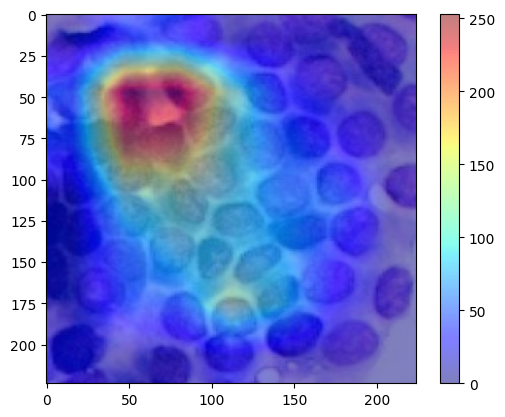

In [77]:
import torch.nn.functional as F
import cv2

# Tạo đối tượng model
# model = H97_EfficientNet(num_classes=3, retrainEfficientNet=False)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Đường dẫn đến ảnh và label tương ứng
image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B5/431_3.jpg'
image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B5/431_4.jpg'
label = 1  # Thay thế bằng label tương ứng của ảnh

# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/.B2/10_2.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/.B2/8_4.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/.B2/7_4.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/.B2/6_4.jpg'
# label = 0

# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/B6/78_3.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/B6/78_4.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/B6/63_1.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B6/630_2.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B6/628_0.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B6/620_0.jpg'
# label = 2

# Load ảnh
image, label = load_image(image_path, label)
image = image.unsqueeze(0).to(device)

# Lấy đặc trưng từ lớp gần cuối
model.eval()
features = get_features(model, image)

# Lấy trọng số của lớp fully connected cuối cùng
fc_weights = model.fc4.weight.data

# Tính toán CAM cho lớp mục tiêu
cam = get_cam(features, fc_weights, label)

# Hiển thị CAM trên ảnh đầu vào
heatmap = cv2.resize(cam, (image.shape[3], image.shape[2]))
cam = (heatmap * 255).astype("uint8")
plot_cam(image, cam)
# tensor([ 0.0260,  0.2875, -0.1779])

tensor([[ 2.7160, -0.2553, -0.7173]], grad_fn=<AddmmBackward0>)


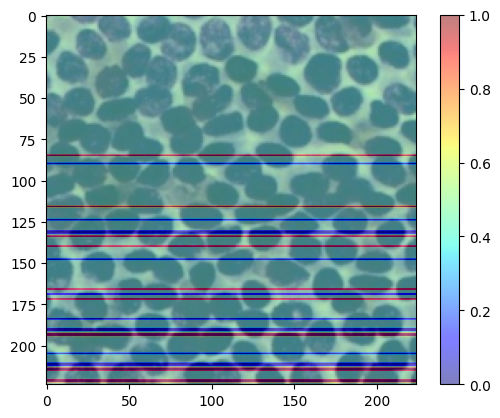

In [106]:
import torch
import torch.nn.functional as F
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torchvision import models, transforms
from PIL import Image

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_layers()

    def hook_layers(self):
        def forward_hook(module, input, output):
            self.activations = output

        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0]

        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    def generate_cam(self, input_image, target_class=None):
        input_image.requires_grad_()
        # Forward pass
        output = self.model(input_image)
        if target_class is None:
            target_class = output.argmax(dim=1).item()

        # Backward pass
        self.model.zero_grad()
        print(output)
        class_loss = output[0, target_class]
        class_loss.backward()

        # Get gradients and activations
        if self.gradients is None or self.activations is None:
            raise ValueError("Gradients or activations not set. Hooks might not be working properly.")
        
        gradients = self.gradients[0]
        activations = self.activations[0]

        # Compute the weights
        weights = torch.mean(gradients, dim=[1, 2], keepdim=True)

        # Compute the CAM
        cam = torch.sum(weights * activations, dim=0).detach().cpu().numpy()
        cam = np.maximum(cam, 0)
        cam = cv2.resize(cam, (input_image.shape[2], input_image.shape[3]))
        cam = cam - np.min(cam)
        cam = cam / np.max(cam)
        return cam

def load_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    return image

def plot_cam(image, cam, alpha=0.5):
    image = image.squeeze().permute(1, 2, 0).cpu().detach().numpy()
    # image = (image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]).clip(0, 1)
    plt.imshow(image)
    plt.imshow(cam, cmap='jet', alpha=alpha)
    plt.colorbar()
    plt.show()

# Sử dụng hàm Grad-CAM với model của bạn
from src.model.classifier.H97 import H97_EfficientNet

# Tạo mô hình
model_path = "/Data/Projects/ThyroidCancer_InfoData_Local/kaggle/working/h97_retrainEfficientNet_B2_B5_B6_dataver3/best_h97_retrainEfficientNet_B2_B5_B6_dataver3_model.pt"
model = H97_EfficientNet()
model.load_state_dict(
    torch.load(
        model_path,
        map_location=torch.device("cpu"),
    )
)
model.eval()

# Lớp mà bạn muốn lấy Grad-CAM từ đó, ví dụ: lớp cuối cùng của feature_extractor
target_layer = model.feature_extractor[-1]

grad_cam = GradCAM(model, target_layer)

# Load ảnh
image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B5/431_3.jpg'
image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B5/431_4.jpg'

# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/.B2/10_2.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/.B2/8_4.jpg'
image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/.B2/7_4.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/.B2/6_4.jpg'

# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/B6/78_3.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/B6/78_4.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/B6/63_1.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B6/630_2.jpg'
image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B6/628_0.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B6/620_0.jpg'

input_image = load_image(image_path)
input_image = input_image.to(device)

# Tạo Grad-CAM
target_class = None  # hoặc gán target_class là class bạn muốn
target_class = 1
cam = grad_cam.generate_cam(input_image, target_class)

# Hiển thị Grad-CAM
plot_cam(input_image, cam)


In [4]:
%pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 547.2 kB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.2-py3-none-any.whl size=38336 sha256=75d5042b123a00aacb38b86f16ddddf83369c8496e7e3986ef9543b7a77b8499
  Stored in directory: /home/harito/.cache/pip/wheels/28/25/dd/cf5dc1751e3d5b89ea4d877a61ba969939c78cf4223ace9c59
Successfully built grad-cam

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


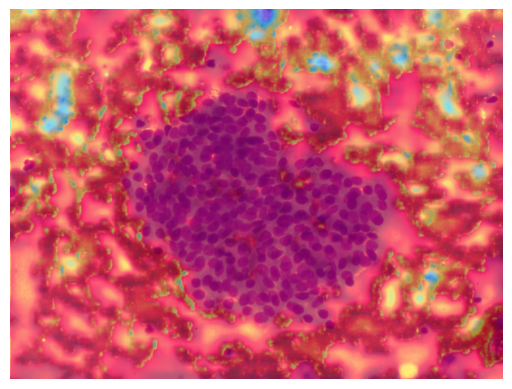

In [18]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_heatmap(heatmap_np, use_rgb=False):
    if use_rgb:
        plt.imshow(heatmap_np, cmap='jet', alpha=0.5)
    else:
        plt.imshow(heatmap_np, cmap='jet')
    plt.axis('off')  # Tắt các trục để hiển thị rõ hơn
    plt.show()


def load_image(image_path, size=(224, 224)):
    transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    return image

target_layers = model.feature_extractor[-2]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Đường dẫn đến ảnh và label tương ứng
image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B5/431_3.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B5/431_4.jpg'

# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/.B2/10_2.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/.B2/8_4.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/.B2/7_4.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/.B2/6_4.jpg'

# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/B6/78_3.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/B6/78_4.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/B6/63_1.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B6/630_2.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B6/628_0.jpg'
# image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B6/620_0.jpg'
image_path = '/Data/Projects/ThyroidCancer/Phase1/Data/origin_data/B256/B5/z5122228469384_996f901c14d344eb703ad5447ad17a4c.jpg'

input_image = load_image(image_path, size=(768, 1024))
input_image = input_image.to(device)
input_tensor = input_image
input_tensor.requires_grad = True

cam = GradCAM(model=model, target_layers=target_layers)
targets = None
targets = [ClassifierOutputTarget(0)]

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
img_np = input_tensor.squeeze(0).cpu().detach().numpy()
img_np = np.transpose(img_np, (1, 2, 0))
visualization = show_cam_on_image(img_np, grayscale_cam, use_rgb=False)

# Ví dụ sử dụng:
plot_heatmap(visualization)

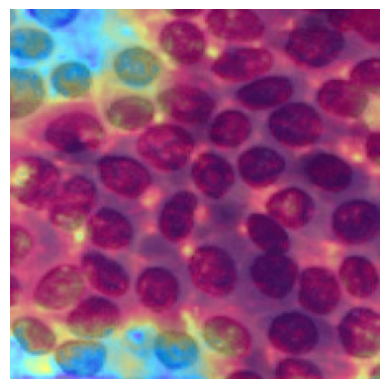

In [45]:
import matplotlib.pyplot as plt

def plot_image(image_np):
    plt.imshow(image_np)
    plt.axis('off')  # Tắt các trục để hiển thị ảnh rõ ràng hơn
    plt.show()

# Ví dụ sử dụng:
plot_image(visualization)


# Way to run YOLO model with ONNX

In [ ]:
import onnxruntime as ort
import numpy as np
import cv2

# Load ONNX model
onnx_model_path = 'path/to/your/model.onnx'
session = ort.InferenceSession(onnx_model_path)

# Get model input and output names
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

# Load and preprocess input image
def preprocess(image_path, target_size=(640, 480)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)  # Resize to the target size
    image = image.astype(np.float32)
    image = image / 255.0  # Normalize to [0, 1]
    image = np.transpose(image, (2, 0, 1))  # Change data layout from HWC to CHW
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Perform inference
image_path = 'path/to/your/image.jpg'
input_image = preprocess(image_path, target_size=(640, 480))  # Change to (1024, 768) if needed
results = session.run([output_name], {input_name: input_image})

# Process the results
# Assuming the model outputs bounding boxes in the format (batch, boxes, 4) and class probabilities (batch, boxes, num_classes)
boxes = results[0][0]  # Get the bounding boxes
scores = results[1][0]  # Get the class probabilities

# Example: Print the results
print("Bounding Boxes:", boxes)
print("Scores:", scores)
